In [3]:
#!/usr/bin/env python

import itk
import argparse


# Define input values
input_image = "Brain_CT.jpg"
output_image = "output_1.png"
axis_to_flip = 0  # 0 for vertical flip, 1 for horizontal flip

PixelType = itk.UC
Dimension = 2

ImageType = itk.Image[PixelType, Dimension]

reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image)

flipFilter = itk.FlipImageFilter[ImageType].New()
flipFilter.SetInput(reader.GetOutput())

if axis_to_flip == 0:
    flipAxes = (True, False)
else:
    flipAxes = (False, True)

flipFilter.SetFlipAxes(flipAxes)

writer = itk.ImageFileWriter[ImageType].New()
writer.SetFileName(output_image)
writer.SetInput(flipFilter.GetOutput())

writer.Update()


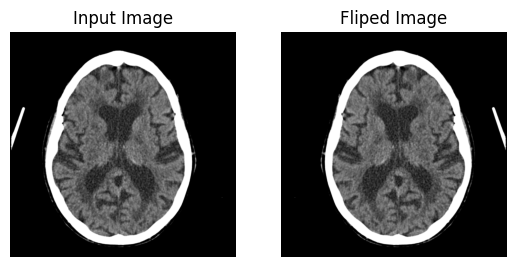

In [4]:
#plot the images
import matplotlib.pyplot as plt

input_image = itk.imread(input_image)
output_image = itk.imread(output_image)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Fliped Image')
plt.axis('off')

plt.show()